In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
train_data = pd.read_csv('train.csv')
x_train, y_train, x_test, y_test = train_test_split(
    train_data.drop('label', axis=1), 
    train_data['label'], 
    test_size=0.3, 
    random_state=101)

In [3]:
rfc = RandomForestClassifier()
rfc.fit(x_train,x_test)
predictions = rfc.predict(y_train) 
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1235
           1       0.98      0.98      0.98      1414
           2       0.96      0.96      0.96      1265
           3       0.94      0.95      0.95      1271
           4       0.98      0.95      0.97      1239
           5       0.96      0.96      0.96      1114
           6       0.98      0.97      0.97      1249
           7       0.96      0.97      0.97      1295
           8       0.95      0.96      0.96      1223
           9       0.94      0.95      0.95      1295

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600



In [4]:
pickle.dump(rfc, open('english_digits_predictor.pkl', 'wb'))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import base64
import cv2
import pickle

In [2]:
image_data = b'iVBORw0KGgoAAAANSUhEUgAAAVUAAAE0CAYAAACcpKDRAAAAAXNSR0IArs4c6QAAEv9JREFUeF7t3d+PHfP/B/D3drV+BJUSu36UXSLxI/UHcCMuhHDVRG+buOCKIOGCuJEgIUjd4MaVREIa6kdC4kaEuCOEIFLbUlpNKILu0u03s9/PNtvdM+fMnHnN2TMzj03c2Pe8Zt6P92ufnfOes2cnjh8/fjz5IkCAAIEQgQmhGuKoCAECBJYEhKpGIECAQKCAUA3EVIoAAQJCVQ8QIEAgUECoBmIqRYAAAaGqBwgQIBAoIFQDMZUiQICAUNUDBAgQCBQQqoGYShEgQECo6gECBAgECgjVQEylCBAgIFT1AAECBAIFhGogplIECBAQqnqAAAECgQJCNRBTKQIECAhVPUCAAIFAAaEaiKkUAQIEhKoeIECAQKCAUA3EVIoAAQJCVQ8QIEAgUECoBmIqRYAAAaGqBwgQIBAoIFQDMZUiQICAUNUDBAgQCBQQqoGYShEgQECo6gECBAgECgjVQEylCBAgIFT1AAECBAIFhGogplIECBAQqnqAAAECgQJCNRBTKQIECAhVPUCAAIFAAaEaiKkUAQIEhKoeIECAQKCAUA3EVIoAAQJCVQ8QIEAgUECoBmIqRYAAAaGqBwgQIBAoIFQDMZUiQICAUNUDBAgQCBQQqoGYShEgQECo6gECBAgECgjVQEylCBAgIFT1AAECBAIFhGogplIECBAQqnqAAAECgQJCNRBTKQIECAhVPUCAAIFAAaEaiKkUAQIEhKoeIECAQKCAUA3EVIoAAQJCVQ8QIEAgUECoBmIqRYAAAaHa0B7Yvn17euONN05c/fHjx3NnMjExkbL/nn/++XTnnXeeNG5ubi7t2bMnHTlyJO3cuTPNzMw0VMRlExgPAaE6Huuw5ipOO+20tLCwkPqFZZVLz0J27969aXZ29kSZc845J3366aeCtQqsYzsvIFTHoAXqDtAyU9ywYUM6duxYmUOMJUBghYBQXYd2yEJ0fn5+Hc5c/JSTk5Ppv//+K36AkQQILAkI1RE2QhPCdCWHYB1hczhVawSE6giWsmlhukyS7bsuLi6OQMgpCLRHQKjWuJaRYZoF3NJLi4mJtG3btvTZZ5+VvvLszjN78FXm4VeZsaUvyAEEWiggVGtY1KphmgVn9tam7Ol8XV+nnHJKoQdSQrWuFVC3rQJCNXhls7vBMi+ZswA999xz0+HDh4OvZHC55bvffiOF6mBHIwisFBCqgf2QvR2paAideuqp6ejRo4FnL1+qSKhu3rx56RcDfBEgUExAqBZzGjiqSEBlRcYhTJcnU+SaPawauPQGEDhJQKhWbIjp6el06NChgVXGKUzLhGo2tujd90AEAwh0QECoVljkIg+kxjFMhWqFRXcogQECQnXIFimyfzo1NZUOHjw45BnqP6zIy393qvWvgzO0S0CoDrGeRcKoCS+Zi8wj47GvOkSTOKSzAkK1xNIXebnfpAASqiUW31ACBQWEakGoIoHatE94KhqqtgAKNolhBHygSvEeGBRA4/xAKm+Wg+a08rgmbGcUX00jCdQn4E61gO2gu9SmBk6ZUM1+rfXff/8toGUIgW4LCNUC658XPk3aP+01zTKh2vS5FlhmQwiECAjVAYz97lKbeoe6POV+/1j0mlvT5xvyE6MIgQECQnUQ0P8+cm/1sK1bt6b9+/c3usHyQjV7qd/rU/+FaqOX28WPSECo9oFu811qNu28UM3Cs9f37KuO6KfSaRotIFT7LF9e6Jx33nnr8lF9kZ12zTXXpK+++mpNyeW9015zt68auQJqtVVAqOasbFfvUq+++ur05Zdfprxfw7UF0NYoMK8oAaGaI5l3l9qGzxfNu0vNKJZDc+PGjT33VW+99db09ttvR/WfOgRaJyBUeyxp1+9Sl0lsAbTu592ERiAgVHsg592lnnHGGemvv/4awbLUd4orr7wyffPNNz1PsPqlfb8HWfVdocoEmi0gVEuEahv2E/P2Spf3Uldy2Fdt9g+3q18fAaFaMFTb8uS7zN3nbbfdlt555501Qtl+68LCwvp0rLMSGHMBoVowVJv2CVR5fVd2n7Ts+DHvd5dHoHYBobqKePv27en1119fA5/9/927d9e+IHWeYNOmTT0/FKXftkaZO9s6r11tAk0REKqrVmpycjItLi6uWb8276f2m5t91ab8KLvOcREQqqtWos0hMsxdZ/Y5sb32T9vwj8y4/BC6jnYJCNVV6zlM8DSlJYbdH+11nFBtyqq7zlELCNWOh2qRJ/m9QjXbn52fnx91vzofgbEXEKoFQrUNb6eqsq0x7B3u2He/CyRQg4BQLRCq2cOrXp8vWsN61FayyrZGlWNrm5DCBMZUQKiuWJjs80KPHTu2ZqmyBzXZy+SmfuXdpRa9A69yl9tUM9dNYFgBobpCro3hcdlll6Xvv/++Z39cccUV6dtvvx3YO3nvALj99tvTq6++OvB4Awh0SUCorljtNr7MjfqjhfZVuxQL5lpFQKi2OFT7/bXUsm+JauM/OFV+cBxLIE9AqLY0VPO2MrLpXn755em7774r9VPRxq2RUgAGEygoIFRbFqq//vpryv6GVt6daNGHU6v7Z8eOHem1115b01bZfuvRo0cLtpthBNovIFRbFKp5n1uwso3Lvuxfeax91fYHghlWFxCqLQjViy++OB04cGBgN1QJ1Ky4fdWBxAYQSEK1QKhedNFF6ccffxzLdum3d7rygi+99NI0NzdXaQ5t/gSvSjAOJrAyR45XvX1pEefMzEzat29fzxmNG1PeLyr0uvitW7em/fv3V16p7G90/fPPP2vqjJtN5YkqQKCCgDvVVXh5L3HH5ZP/v/7663TVVVcVWvJhH0r1K+4TqwrRG9RhAaG6avHPP//8dPjw4Z4tsd7BWvSlfnbx2RyydwFEf/UK1dNPPz39/fff0adSj0AjBYRqj2Xr96b59QjWMi/16/7wl14262HSyJ82F90JAaHaY5m3bNmSfvvtt9wGGEWIZA+Wfvjhh9z3m66+uDpe6vcC8A6ATuSCSVYQEKo5eIPe81lXsJZ5ib986bOzs2nv3r0V2qD4oUK1uJWR3RQQqn3WfRTBOjU1tbT/OcwT9LqCveyDqmz8MNffzR85s267gFAdsMKDgjW7c8s+bzXb9xz0NT09nX755ZfKATSql/pe/g9aUd8nsFZAqBboikHBWqBEyJAsTC+55JLKb+KvcjFe/lfRc2wXBIRqwVVez2Bdj5f5eSxCtWDDGNZZAaFaYulHGaxZeL377rvppptuKnGF9Q8VqvUbO0OzBYRqyfWrM1izwMruSsf5jwwK1ZINY3jnBITqEEuePZRaXFys9MBpOZx27dqV7r777iGuYn0OEarr4+6szREQqgFrld29Zm8p6vfB0Nlp3n///XTjjTcGnHH9SgjV9bN35mYICNVmrNPYXKVQHZulcCFjKiBUx3RhxvWyhOq4rozrGhcBoTouK9GQ6xCqDVkol7luAkJ13eibeWKh2sx1c9WjExCqo7NuxZmEaiuW0SRqFBCqNeK2sbRQbeOqmlOkgFCN1OxALaHagUU2xUoCQrUSX/cOFqrdW3MzLicgVMt5dX60UO18CwAYICBUtUgpAaFaisvgDgoI1Q4u+rBTfvDBB9NTTz215vD1/NDsYefiOAJ1CQjVumRbWDfvLvWuu+5KL7zwQgtnbEoEygsI1fJmnTwi7y41w/D3qTrZEiadIyBUtUYhgby71AceeCA9+eSThWoYRKALAkK1C6tccY7uUisCOrxTAkK1U8s93GTdpQ7n5qhuCgjVbq574VlfcMEF6eDBgz3H20stzGhghwSEaocWu+xUL7zwwvTzzz/3PMxeallN47siIFS7stIl59kvULNS7lJLghreGQGh2pmlLj7RQYHqLrW4pZHdExCq3VvzvjMeFKhTU1O5e6woCRBISajqghMCmzdvTn/88UeuSPbQ6qeffiJGgEAfAaGqPZYE8t42tcwjUDUKgWICQrWYU2tHPf744+nhhx/uOz+B2trlN7EaBIRqDahNKPnss8+m+++/f+ClCtSBRAYQOElAqHasIYqGacbyyCOPpEcffbRjQqZLoJqAUK3md+Loubm5tGfPnnTkyJG0c+fONDMzE1Q5pkyZMM3O6H2oMe6qdE9AqAaseRaos7OzJyqdddZZ6fPPPx+LYL322mvTF198UXiWZ599dvr9998LjzeQAIGTBYRqQEc88cQT6aGHHjp5X2ViIp155plLYfvyyy+nbdu2BZypWIksGP/8889ig1eMeuyxx9bMo3QRBxDouIBQDWiAm2++Ob333nt9K2XbAW+++WYt4friiy+me+65Jy0sLAw1m2eeeSbdd999Qx3rIAIE3KmG98ANN9yQPvjgg0J1t2zZkt5666103XXXFRrfa9D111+/9EEn2bZDlb1PYTr0EjiQQK6AO9WA5rj33nvTrl27SlXauHFjmpycXArFxcXF3HAc9P1SJ/3fYGE6jJpjCBQTEKrFnAaO+vDDD1MWVp988kk6dOhQpTvIgScbYkD2G1NPP/20l/lD2DmEQBkBoVpGq8TYl156aek9nvv27StxVOzQTZs2peeeey5lf+3UFwECoxEQqjU7Z29nuuWWW9KBAwdqPtP/l/cbUCNhdhICuQJCdUTN8fHHH6fsXQLDvNWp3yVu2LAh7dixI73yyisjmonTECDQT0Cojrg/du/ene644440Pz+/dOZBD6Ky72f/Ze93nZ6eTh999NGIr9jpCBAoIyBUy2gZS4AAgQECQlWLECBAIFBAqAZiKkWAAAGhqgcIECAQKCBUAzGVIkCAgFDVAwQIEAgUEKqBmEoRIEBAqOoBAgQIBAoI1UBMpQgQICBU9QABAgQCBYRqIKZSBAgQEKp6gAABAoECQjUQUykCBAgIVT1AgACBQAGhGoipFAECBISqHiBAgECggFANxFSKAAECQlUPECBAIFBAqAZiKkWAAAGhqgcIECAQKCBUAzGVIkCAgFDVAwQIEAgUEKqBmEoRIEBAqOoBAgQIBAoI1UBMpQgQICBU9QABAgQCBYRqIKZSBAgQEKp6gAABAoECQjUQUykCBAgIVT1AgACBQAGhGoipFAECBISqHiBAgECggFANxFSKAAECQlUPECBAIFBAqAZiKkWAAAGhqgcIECAQKCBUAzGVIkCAgFDVAwQIEAgUEKqBmEoRIEBAqOoBAgQIBAoI1UBMpQgQICBU9QABAgQCBYRqIKZSBAgQEKp6gAABAoECQjUQUykCBAgIVT1AgACBQAGhGoipFAECBISqHiBAgECggFANxFSKAAECQlUPECBAIFBAqAZiKkWAAAGhqgcIECAQKCBUAzGVIkCAgFDVAwQIEAgUEKqBmEoRIEBAqOoBAgQIBAoI1UBMpQgQICBU9QABAgQCBYRqIKZSBAgQEKp6gAABAoECQjUQUykCBAgIVT1AgACBQAGhGoipFAECBISqHiBAgECggFANxFSKAAECQlUPECBAIFBAqAZiKkWAAAGhqgcIECAQKCBUAzGVIkCAgFDVAwQIEAgUEKqBmEoRIEBAqOoBAgQIBAoI1UBMpQgQICBU9QABAgQCBYRqIKZSBAgQEKp6gAABAoECQjUQUykCBAgIVT1AgACBQAGhGoipFAECBISqHiBAgECggFANxFSKAAECQlUPECBAIFBAqAZiKkWAAAGhqgcIECAQKCBUAzGVIkCAgFDVAwQIEAgUEKqBmEoRIEBAqOoBAgQIBAoI1UBMpQgQICBU9QABAgQCBYRqIKZSBAgQEKp6gAABAoECQjUQUykCBAgIVT1AgACBQAGhGoipFAECBISqHiBAgECggFANxFSKAAECQlUPECBAIFBAqAZiKkWAAAGhqgcIECAQKCBUAzGVIkCAgFDVAwQIEAgUEKqBmEoRIEBAqOoBAgQIBAoI1UBMpQgQICBU9QABAgQCBYRqIKZSBAgQEKp6gAABAoECQjUQUykCBAgIVT1AgACBQAGhGoipFAECBISqHiBAgECggFANxFSKAAECQlUPECBAIFBAqAZiKkWAAAGhqgcIECAQKCBUAzGVIkCAgFDVAwQIEAgUEKqBmEoRIEBAqOoBAgQIBAoI1UBMpQgQICBU9QABAgQCBYRqIKZSBAgQEKp6gAABAoECQjUQUykCBAgIVT1AgACBQAGhGoipFAECBISqHiBAgECggFANxFSKAAECQlUPECBAIFBAqAZiKkWAAAGhqgcIECAQKCBUAzGVIkCAgFDVAwQIEAgUEKqBmEoRIEBAqOoBAgQIBAoI1UBMpQgQICBU9QABAgQCBYRqIKZSBAgQEKp6gAABAoECQjUQUykCBAgIVT1AgACBQAGhGoipFAECBISqHiBAgECggFANxFSKAAECQlUPECBAIFBAqAZiKkWAAAGhqgcIECAQKCBUAzGVIkCAgFDVAwQIEAgUEKqBmEoRIEBAqOoBAgQIBAoI1UBMpQgQICBU9QABAgQCBYRqIKZSBAgQEKp6gAABAoEC/weDSardhmTW7QAAAABJRU5ErkJggg=='
with open("imageToSave.png", "wb") as fh:
    fh.write(base64.decodebytes(image_data))

In [3]:
image = cv2.imread('imageToSave.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
image = cv2.resize(image, (28,28), interpolation = cv2.INTER_AREA)
resized_image = image.reshape(1,784)
reversed_image = np.where(image==255, 0, image)
# reversed_image = np.where(reversed_image!=0, 255, reversed_image)


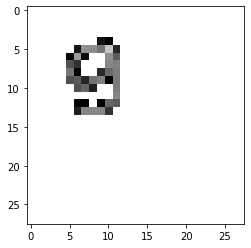

In [4]:

plt.imshow(reversed_image, cmap=plt.cm.binary)
# image

In [5]:
english_digits_predictor = pickle.load(open('english_digits_predictor.pkl', 'rb'))

In [6]:
predicted = english_digits_predictor.predict(reversed_image.reshape(1,784))

In [7]:
predicted[0]

7